In [705]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [706]:
def calculate_scaled_radius(scale_factor, original_radius):
    return int(round(original_radius * scale_factor))

# Achando a moeda de 5 centavos

In [713]:
img = cv2.imread('fotos/img1.png')
img = cv2.resize(img, (720, 720))
img = cv2.GaussianBlur(img, (3,3), 0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

None
40


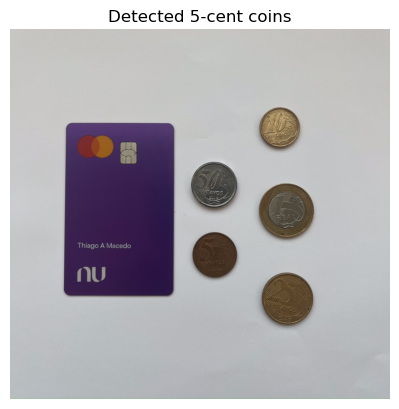

In [708]:
scale_factor = 39.48598130841121
original_radius = 1.02
scaled_radius = calculate_scaled_radius(scale_factor, original_radius) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                           param1=300, param2=30,
                           minRadius=scaled_radius,
                           maxRadius=scaled_radius)

print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        img_rgb = cv2.circle(img_rgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
print(scaled_radius_5_cent)

# Display the image with the detected circles using plt
plt.imshow(img_rgb)
plt.title('Detected 5-cent coins')
plt.axis('off')
plt.show()

None
40


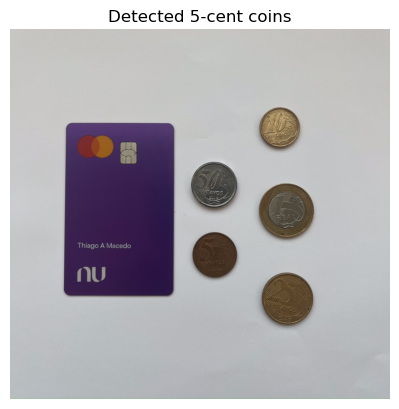

In [709]:
scale_factor = 39.48598130841121
original_radius = 0.9
scaled_radius = calculate_scaled_radius(scale_factor, original_radius) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                           param1=300, param2=30,
                           minRadius=scaled_radius,
                           maxRadius=scaled_radius)

print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        img_rgb = cv2.circle(img_rgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
print(scaled_radius_5_cent)

# Display the image with the detected circles using plt
plt.imshow(img_rgb)
plt.title('Detected 5-cent coins')
plt.axis('off')
plt.show()

None
40


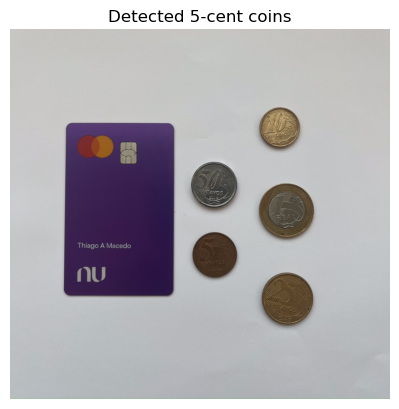

In [710]:
scale_factor = 39.48598130841121
original_radius = 1.2
scaled_radius = calculate_scaled_radius(scale_factor, original_radius) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                           param1=300, param2=30,
                           minRadius=scaled_radius,
                           maxRadius=scaled_radius)

print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        img_rgb = cv2.circle(img_rgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
print(scaled_radius_5_cent)

# Display the image with the detected circles using plt
plt.imshow(img_rgb)
plt.title('Detected 5-cent coins')
plt.axis('off')
plt.show()

None
40


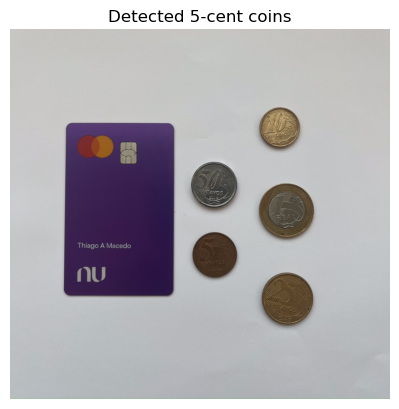

In [711]:
scale_factor = 39.48598130841121
original_radius = 1.1
scaled_radius = calculate_scaled_radius(scale_factor, original_radius) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                           param1=300, param2=30,
                           minRadius=scaled_radius,
                           maxRadius=scaled_radius)

print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        img_rgb = cv2.circle(img_rgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
print(scaled_radius_5_cent)

# Display the image with the detected circles using plt
plt.imshow(img_rgb)
plt.title('Detected 5-cent coins')
plt.axis('off')
plt.show()

None
40


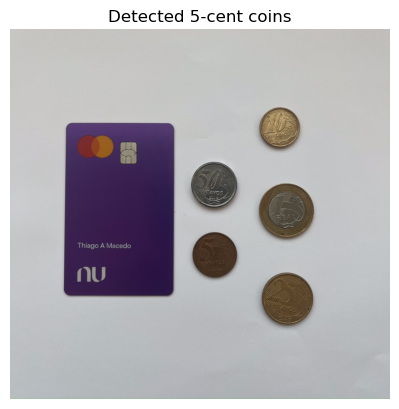

In [712]:
scale_factor = 39.48598130841121
original_radius = 1.4
scaled_radius = calculate_scaled_radius(scale_factor, original_radius) 

circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 30,
                           param1=300, param2=30,
                           minRadius=scaled_radius,
                           maxRadius=scaled_radius)

print(circles)

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        img_rgb = cv2.circle(img_rgb, (i[0], i[1]), i[2], (0, 255, 0), 2)
        
print(scaled_radius_5_cent)

# Display the image with the detected circles using plt
plt.imshow(img_rgb)
plt.title('Detected 5-cent coins')
plt.axis('off')
plt.show()